# Task -2 Model Fitting Using Machine learning Models 

In [61]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.combine import SMOTEENN  
import pickle
%matplotlib inline

In [2]:
cust_df = pd.read_csv("\Data Analysis With Python\GDSC_ML_Task\data\processed_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sian\AppData\Local\Temp\ipykernel_4324\48593022.py:1: SyntaxWarning: invalid escape sequence '\D'
  cust_df = pd.read_csv("\Data Analysis With Python\GDSC_ML_Task\data\processed_data.csv")


In [3]:
cust_df.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0,1,29.85,29.85,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,34,56.95,1889.50,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,2,53.85,108.15,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0,45,42.30,1840.75,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,2,70.70,151.65,1.0


In [4]:
print(f"Outcome Distribution in the Dataset : \n {cust_df['Churn'].value_counts() / cust_df.shape[0]}")

Outcome Distribution in the Dataset : 
 Churn
0.0    0.734215
1.0    0.265785
Name: count, dtype: float64


In [5]:
cust_df.isnull().sum()

gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProt

In [6]:
scaler = StandardScaler()

In [7]:
cust_df[['MonthlyCharges', 'TotalCharges','tenure']] = scaler.fit_transform(cust_df[['MonthlyCharges', 'TotalCharges','tenure']])

#### Scaling Down the TotalCharges and MonthlyCharges usign z-score Normalization

In [8]:
cust_df.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0,-1.280248,-1.161694,-0.994194,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0.064303,-0.260878,-0.173740,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,-1.239504,-0.363923,-0.959649,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0,0.512486,-0.747850,-0.195248,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,-1.239504,0.196178,-0.940457,1.0


In [227]:
cust_df.describe()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03,7032.000000
mean,0.495307,0.504693,0.517491,0.482509,0.701507,0.298493,0.096701,0.903299,0.481371,0.096701,...,0.592719,0.219283,0.216297,0.336320,0.228100,0.162400,-1.126643e-16,6.062651e-17,-1.119064e-16,0.265785
std,0.500014,0.500014,0.499729,0.499729,0.457629,0.457629,0.295571,0.295571,0.499688,0.295571,...,0.491363,0.413790,0.411748,0.472483,0.419637,0.368844,1.000071e+00,1.000071e+00,1.000071e+00,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.199259e-01,8.331482e-01,6.668271e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.793381e+00,2.824261e+00,1.000000


In [9]:
cust_df.shape

(7032, 46)

In [10]:
cust_df.columns

Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_

In [11]:
cust_df.describe()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03,7032.000000
mean,0.495307,0.504693,0.517491,0.482509,0.701507,0.298493,0.096701,0.903299,0.481371,0.096701,...,0.592719,0.219283,0.216297,0.336320,0.228100,0.162400,-1.126643e-16,6.062651e-17,-1.119064e-16,0.265785
std,0.500014,0.500014,0.499729,0.499729,0.457629,0.457629,0.295571,0.295571,0.499688,0.295571,...,0.491363,0.413790,0.411748,0.472483,0.419637,0.368844,1.000071e+00,1.000071e+00,1.000071e+00,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.199259e-01,8.331482e-01,6.668271e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.793381e+00,2.824261e+00,1.000000


## X_train, Y_train  , x_test, y_test Split

In [39]:
# Making the X and Y Train

X = cust_df[[
       'PhoneService_No', 'PhoneService_Yes',
       'gender_Female', 'gender_Male','Partner_No', 'Partner_Yes','Contract_One year',
       'Contract_Two year',
       'OnlineBackup_Yes',   'DeviceProtection_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 
       'TechSupport_No', 
       'StreamingTV_No', 'StreamingTV_Yes', 
       'OnlineBackup_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 
       'SeniorCitizen', 'MonthlyCharges', 'TotalCharges','tenure']]

Y = cust_df['Churn']

In [33]:
X.shape

(7032, 24)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=42)

# Generalized Code for all models Comparison

In [50]:


models ={
    "Logistic Regression":LogisticRegression(C=0.1, max_iter= 100, penalty= 'l2', solver= 'newton-cholesky'),
    'Decision Tree' : DecisionTreeClassifier(criterion='log_loss', max_depth= 6),
    'Random Forest Classifier': RandomForestClassifier(criterion='gini', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100),
    'Support Vector Machine' : SVC()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    # Fitting the Model

    model.fit(x_train,y_train)

    # Making the Prediction on the Test Data and the Train Data :
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # Storing the Weights Assigned By Each Model for Features : 
    if (i==0):
        model_weights= list(model.coef_.flatten())
        y_prd_lin=y_test_pred
       

    # Performance of Model Training Set : 
    model_train_accuracy= accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision= precision_score(y_train,y_train_pred)
    model_train_recall= recall_score(y_train,y_train_pred)
    model_train_rocauc_score= roc_auc_score(y_train,y_train_pred)


    # Performance of Model on  Testing Set
    model_test_accuracy= accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision= precision_score(y_test,y_test_pred)
    model_test_recall= recall_score(y_test,y_test_pred)
    model_test_rocauc_score= roc_auc_score(y_test,y_test_pred)
    


    print(list(models.keys())[i])


    print("Model Performance for Training Set ")
    print("-Accuracy : {:.4f}".format(model_train_accuracy))
    print("-F1-Score : {:.4f}".format(model_train_f1))
    print("-Precision : {:.4f}".format(model_train_precision))
    print("-Recall : {:.4f}".format(model_train_recall))    
    print("-ROC-AUC Score : {:.4f}".format(model_train_rocauc_score))


    print("-----------------------------------------------------------------")

    # Model Performance for Test Set : 

    print("Model Performance for Test Set ")
    print("-Accuracy : {:.4f}".format(model_test_accuracy))
    print("-F1-Score : {:.4f}".format(model_test_f1))
    print("-Precision : {:.4f}".format(model_test_precision))
    print("-Recall : {:.4f}".format(model_test_recall))    
    print("-ROC-AUC Score : {:.4f}".format(model_test_rocauc_score))
    

    print('*'*30)
    print('\n')


Logistic Regression
Model Performance for Training Set 
-Accuracy : 0.7977
-F1-Score : 0.7913
-Precision : 0.6438
-Recall : 0.5344
-ROC-AUC Score : 0.7137
-----------------------------------------------------------------
Model Performance for Test Set 
-Accuracy : 0.7882
-F1-Score : 0.7792
-Precision : 0.6301
-Recall : 0.4920
-ROC-AUC Score : 0.6937
******************************


Decision Tree
Model Performance for Training Set 
-Accuracy : 0.8053
-F1-Score : 0.8078
-Precision : 0.6233
-Recall : 0.6763
-ROC-AUC Score : 0.7642
-----------------------------------------------------------------
Model Performance for Test Set 
-Accuracy : 0.7591
-F1-Score : 0.7643
-Precision : 0.5404
-Recall : 0.6257
-ROC-AUC Score : 0.7165
******************************


Random Forest Classifier
Model Performance for Training Set 
-Accuracy : 0.8544
-F1-Score : 0.8498
-Precision : 0.7721
-Recall : 0.6415
-ROC-AUC Score : 0.7865
-----------------------------------------------------------------
Model Perf

In [27]:
X.columns.shape

(25,)

In [28]:
dict_w = {
     'ColumnName': list(X.columns),
     'WeightValues':list(model_weights)

 }
feature_importance=pd.DataFrame(dict_w)
feature_importance['AbsoluteWeightValues'] = feature_importance['WeightValues'].abs()
feature_importance.sort_values('AbsoluteWeightValues',ascending=False).head(len(X))

,ColumnName,WeightValues,AbsoluteWeightValues
22,tenure,-1.121286,1.121286
20,Contract_Month-to-month,0.709883,0.709883
7,Contract_Two year,-0.587033,0.587033
14,OnlineSecurity_No,0.492658,0.492658
12,InternetService_Fiber optic,0.457810,0.457810
15,TechSupport_No,0.457172,0.457172
24,TotalCharges,0.337523,0.337523
21,SeniorCitizen,0.330599,0.330599
1,PhoneService_Yes,-0.315903,0.315903
0,PhoneService_No,0.315903,0.315903


## Hyperparameter Tunning using GridSearchCV

In [30]:

dst_para={
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth':[x for x in range(1,21)]
}

param_grid_rfc = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [ 'sqrt', 'log2'],  
    'criterion': ['gini', 'entropy']  
}



param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l2'],        
    'max_iter': [500,1000,1500,2000],
    'solver' :['liblinear','newton-cholesky']     
}


In [31]:
GridSearchModels=[
    ('Decision Tress',DecisionTreeClassifier(),dst_para),
    ('Random Forest Classifier',RandomForestClassifier(),param_grid_rfc) ,
    ('Logistic Regression ',LogisticRegression(),param_grid_logistic)
]

In [ ]:
# Creating a Loop to Apply Hyperparamter Tunning to All the Specified Models  :

model_para = {}

for name,model,param in GridSearchModels :
    random=GridSearchCV(estimator=model,param_grid=param,cv=5,n_jobs=-1)

    random.fit(x_train,y_train)
    model_para[name] =random.best_params_

for model_name in model_para :
    print(f"************************* Best Parameters for {model_name} ********************************** ")
    print(model_para[model_name])

In [48]:
# Here we will be predicting probabilites as we require probabilites of postive class   as  we determine it at various thresholds
y_probab=list(models.values())[0].predict_proba(x_test)[:,1]

false_postive_r,true_positive_r,thresh=roc_curve(y_test,y_probab)
auc_score = roc_auc_score(y_test, y_probab)
# print(plt.style.available)

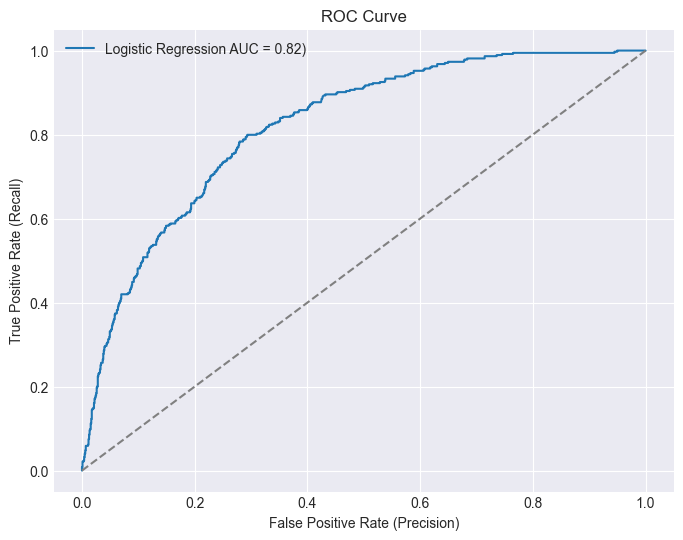

In [49]:
# PLotting the Receiver Operating Characteristic Curve : 
plt.figure(figsize=(8,6))
plt.style.use('seaborn-v0_8-dark')
plt.grid(True)
plt.plot(false_postive_r, true_positive_r, label=f"Logistic Regression AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

<Axes: title={'center': 'Confusion Matrix for Logistic Regression'}>

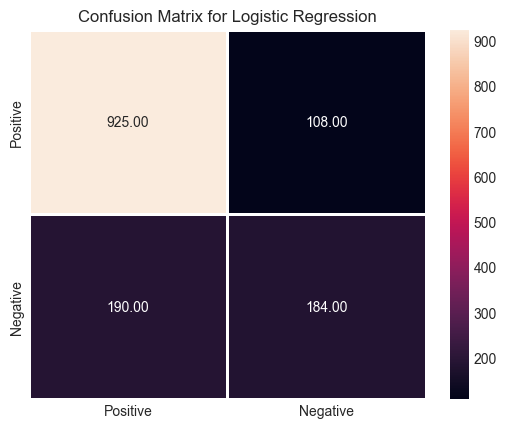

In [62]:
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(confusion_matrix(y_test,y_prd_lin),linewidths=1,xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative'],annot=True, fmt=".2f")